In [1]:
import pandas as pd

import preprocessing as pre
import correlations as corr

In [2]:
#preprocessing stuff
# Read data
games = pd.read_csv("Data/games_detailed_info.csv", index_col=0) # review stats
# 1. Remove columns with > 20% of NA values
key_columns = pre.keep_columns_with_few_na(games)
# 2. Remove redundant/unnecesary columns
unnecessary_columns = ["type", "thumbnail", "image", "suggested_num_players", "suggested_playerage","suggested_language_dependence"]
key_columns = [x for x in key_columns if x not in unnecessary_columns]
# 3. Rename confusing column names
games = games.loc[:,key_columns]
games.rename(columns={"primary": "name", "usersrated": "numratings", "average": "avgrating",
                          "boardgamecategory": "category", "boardgamemechanic": "mechanic",
                          "boardgamedesigner": "designer", "boardgamepublisher": "publisher",
                          "bayesaverage": "bayesavgrating", "Board Game Rank": "rank",
                          "stddev": "stdrating", "median": "medianrating",
                          "owned": "numowned", "trading": "numtrades", "wanting":"numwants",
                          "wishing": "numwishes"}, inplace=True)
# 4. Parse columns with list values
list_colnames = ["category", "mechanic", "designer", "publisher"]
games = pre.parse_list_columns(games, list_colnames)

# 5. Create new dataframes with binary columns of 20 popular items
games_category, category_cnt = pre.create_df_with_binary_columns(games, "category", 20)
games_mechanic, mechanic_cnt = pre.create_df_with_binary_columns(games, "mechanic", 20)
games_designer, designer_cnt = pre.create_df_with_binary_columns(games, "designer", 20)
games_publisher, publisher_cnt = pre.create_df_with_binary_columns(games, "publisher", 20)

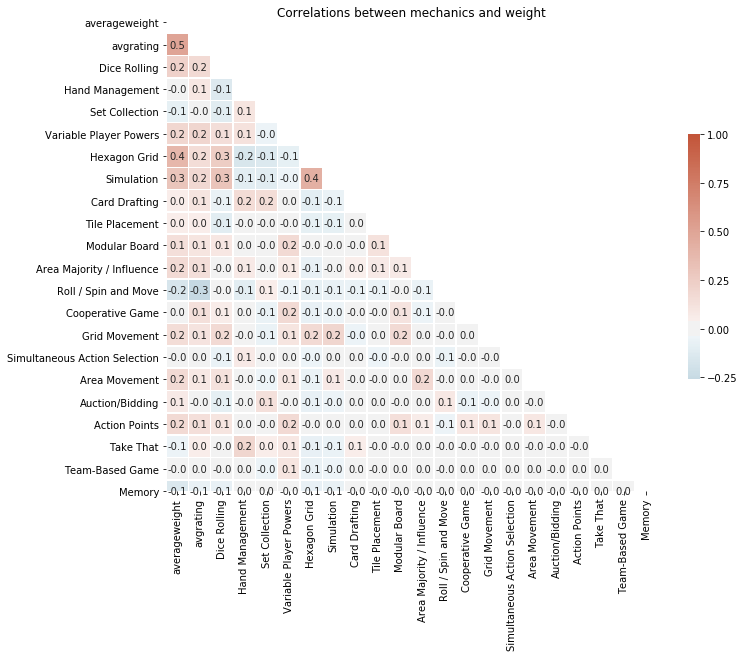

In [3]:
corr.get_weight_corr(games_mechanic,mechanic_cnt)

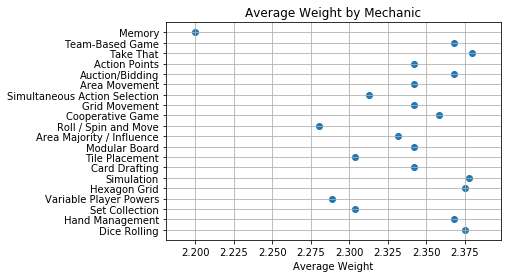

In [4]:
corr.get_average_weight_by_mechanic(games_mechanic,mechanic_cnt)

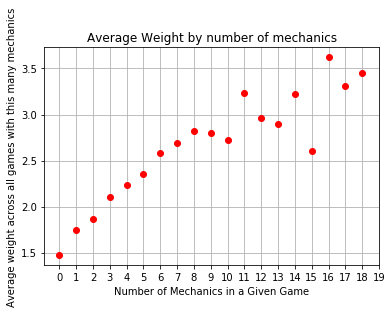

In [5]:
corr.weightVSnumMechanics(games)

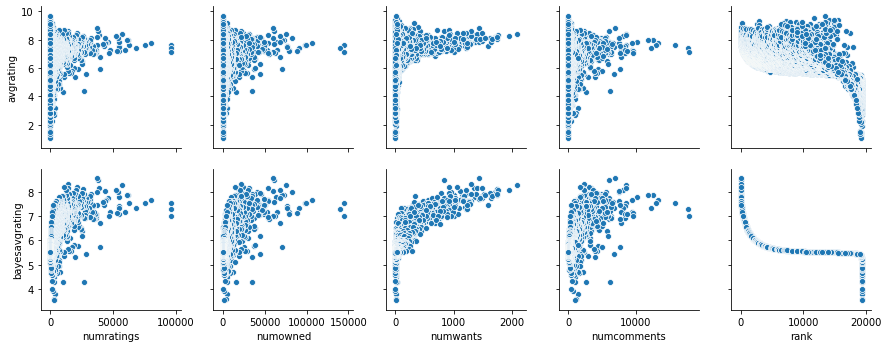

In [6]:
corr.popularity_metric_correlations(games)